In [1]:
import os
from os import path
import numpy as np
import copy
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.visualization import make_lupton_rgb

In [2]:
# New pixels
pwd = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Cutouts-coadd2/DES0229+0335/124779474/'
filename_g = 'DESJ022754.4277+035455.9080_g.fits'
filename_i = 'DESJ022754.4277+035455.9080_i.fits'
filename_r = 'DESJ022754.4277+035455.9080_r.fits'
with fits.open(pwd + filename_g) as hdul:
    data_g = hdul[0].data
with fits.open(pwd + filename_i) as hdul:
    data_i = hdul[0].data
with fits.open(pwd + filename_r) as hdul:
    data_r = hdul[0].data
data_g.shape

(46, 46)

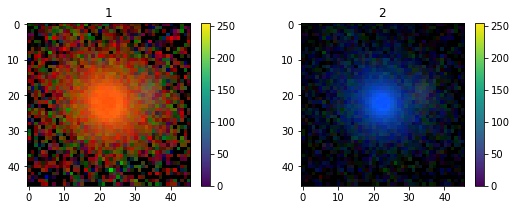

In [3]:
fig, (ax1, ax2) = plt.subplots(figsize=(9, 3), ncols=2)

rgb = make_lupton_rgb(data_i, data_r, data_g, Q=11., stretch=11.)

ax1.set_title('1')
original = ax1.imshow(rgb, aspect='equal')#, vmin = 5, vmax= 240)
fig.colorbar(original, ax=ax1)

rgb = make_lupton_rgb(data_g, data_r, data_i, Q=10., stretch=40.)

ax2.set_title('2')
projection = ax2.imshow(rgb, aspect='equal')
fig.colorbar(projection, ax=ax2)
plt.show()

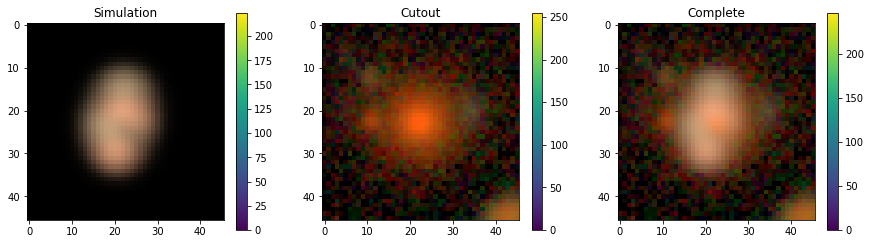

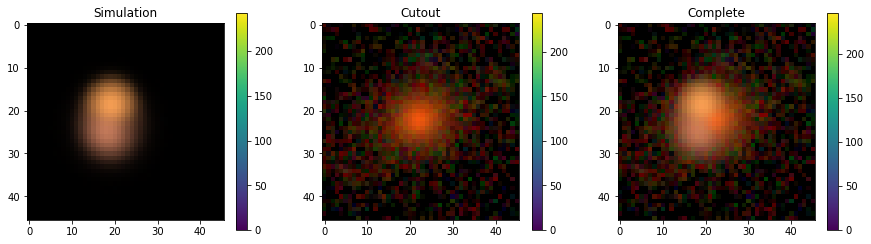

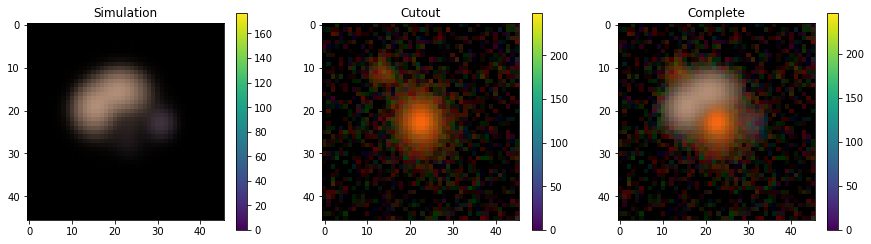

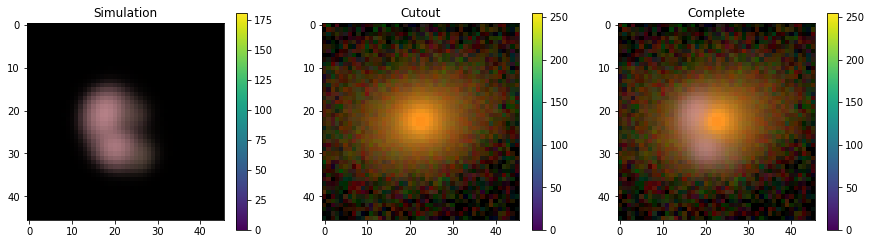

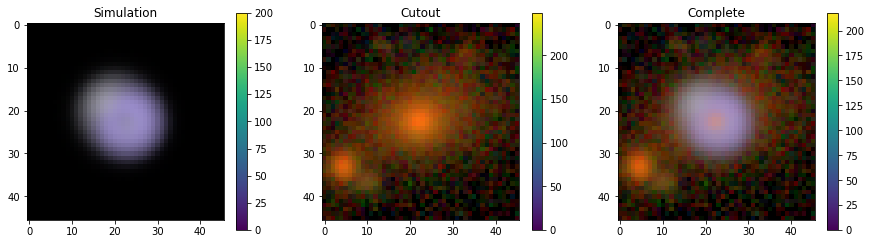

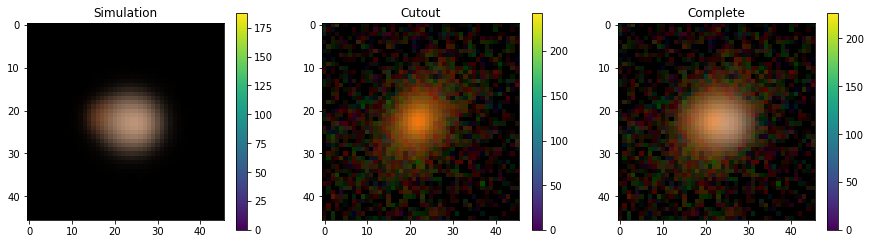

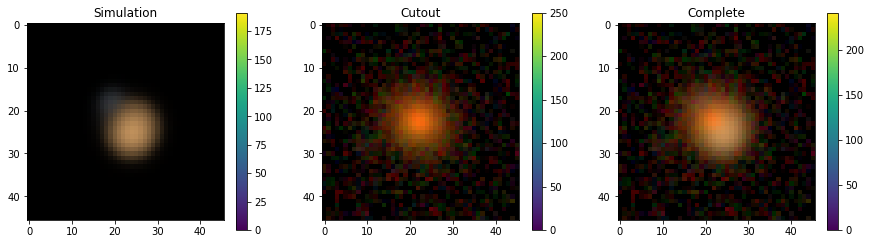

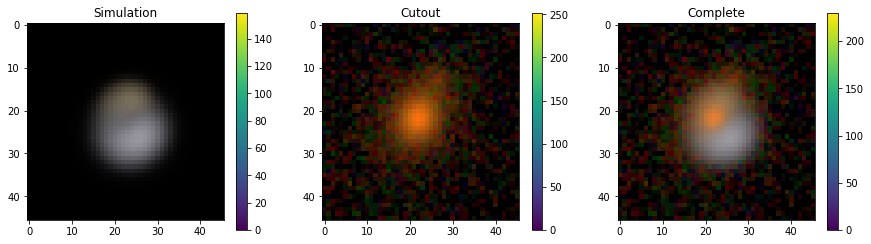

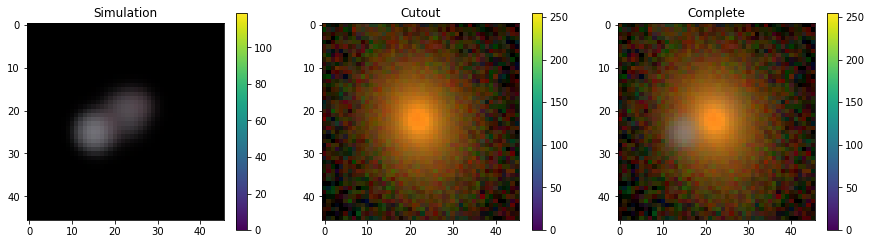

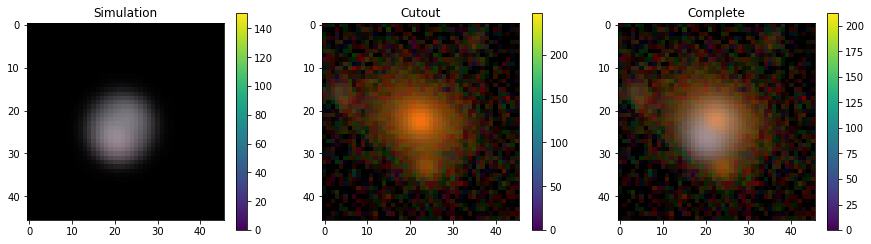

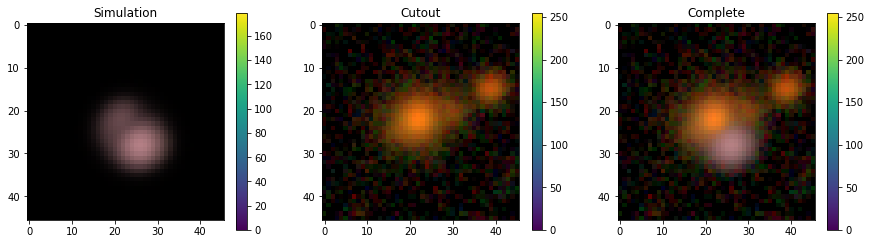

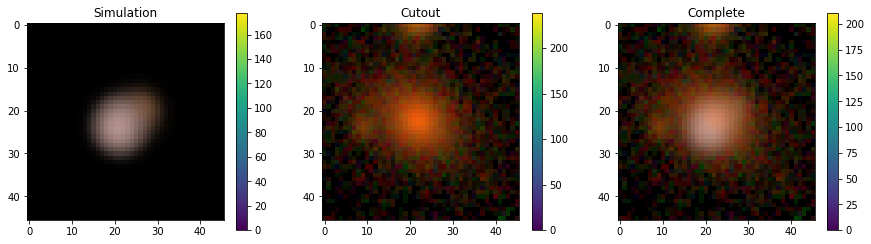

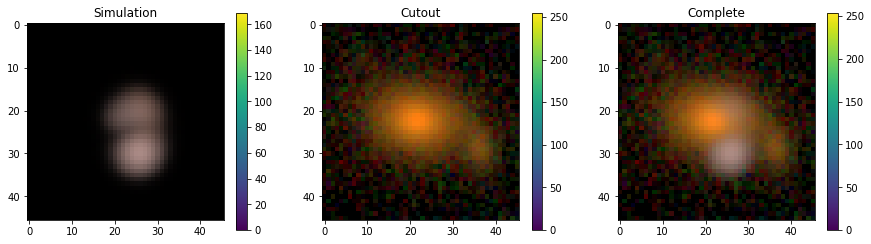

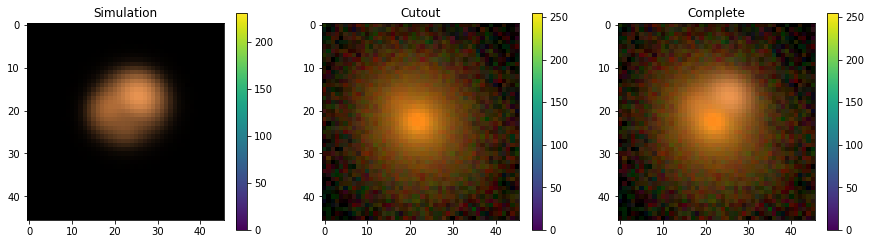

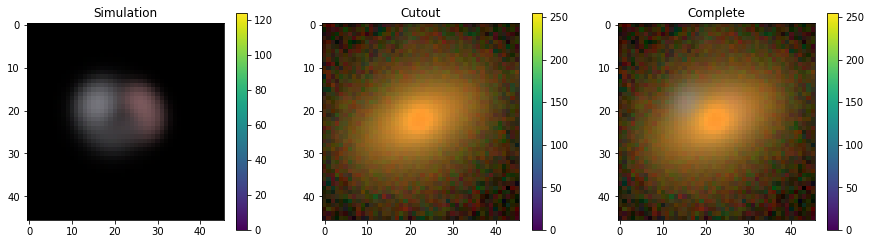

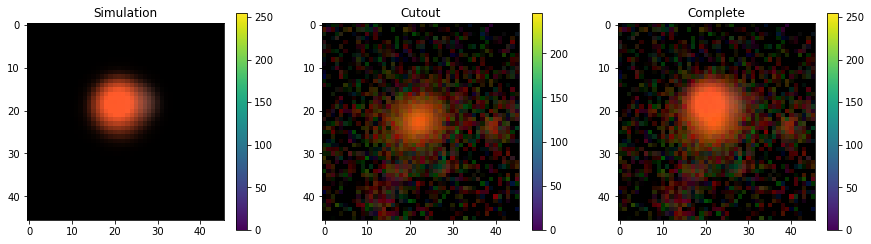

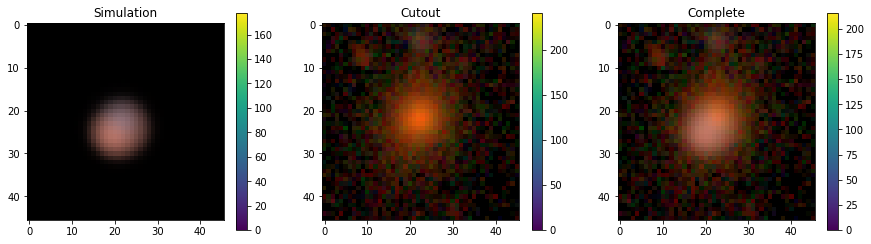

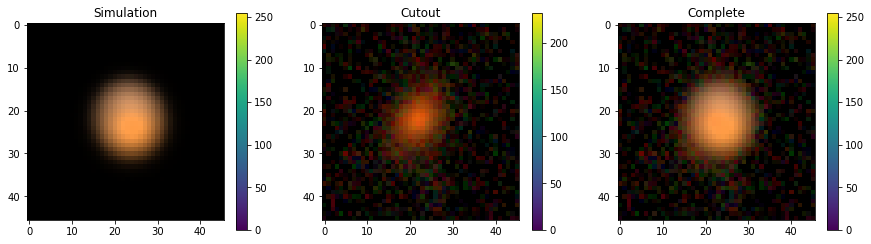

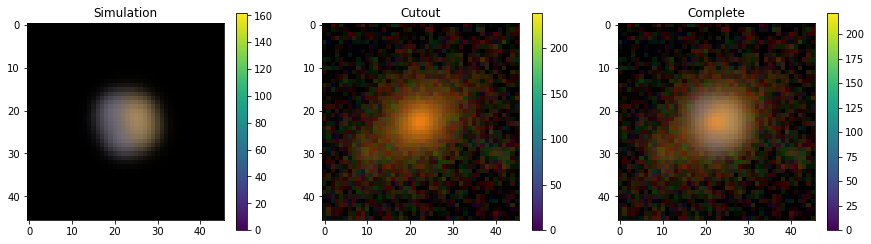

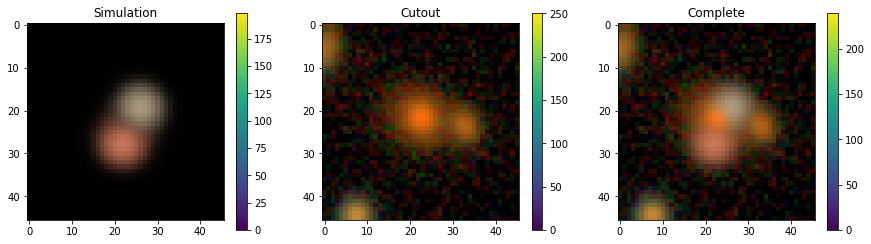

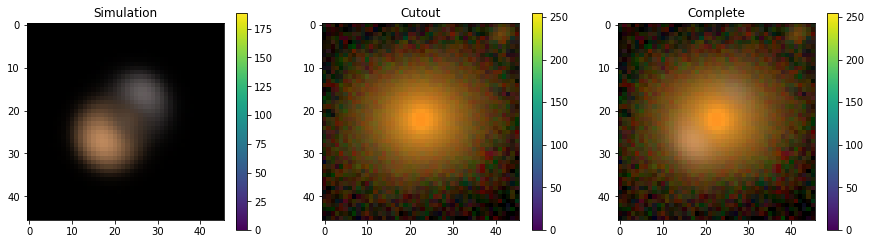

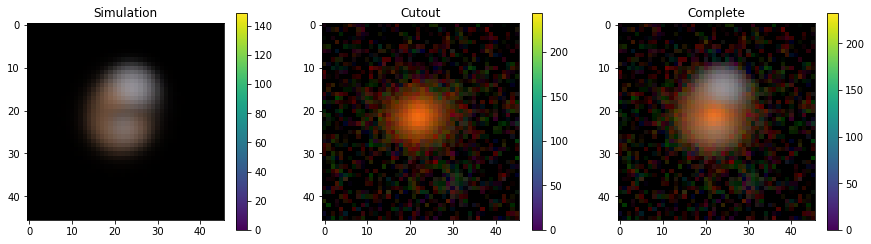

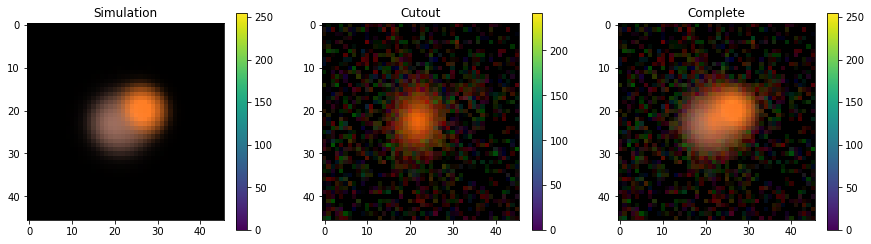

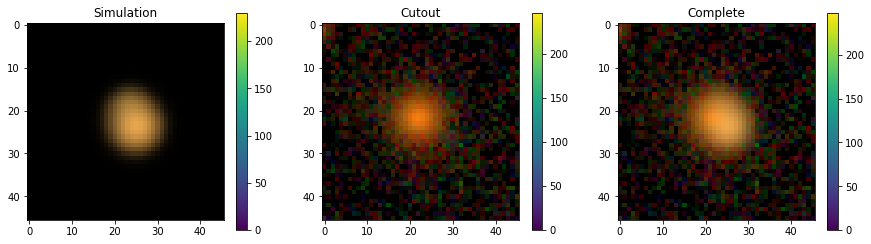

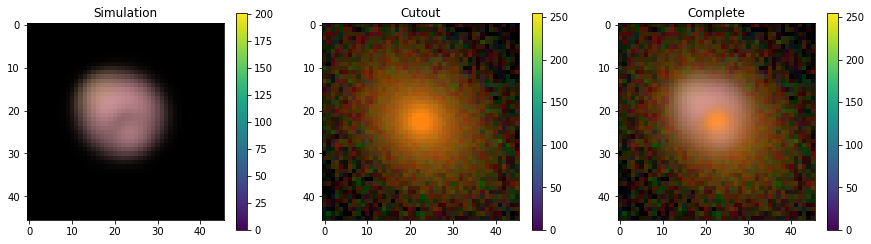

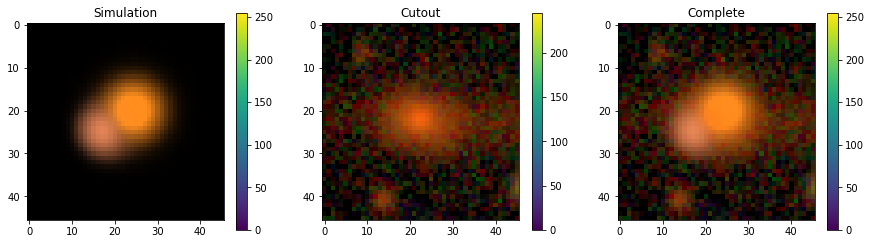

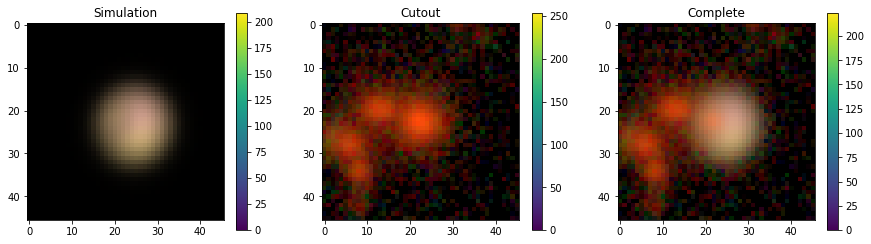

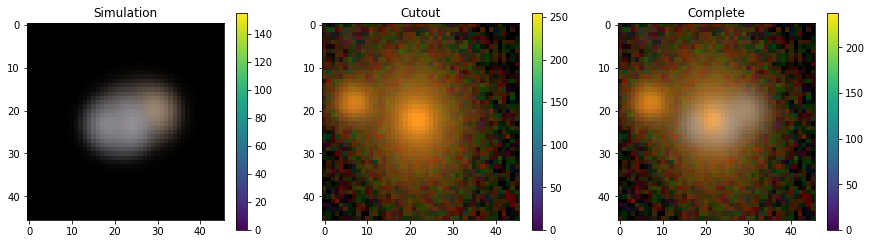

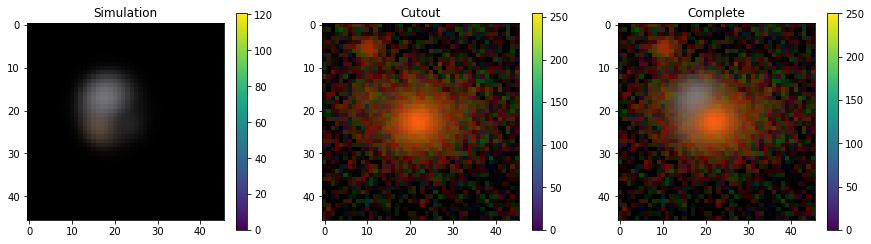

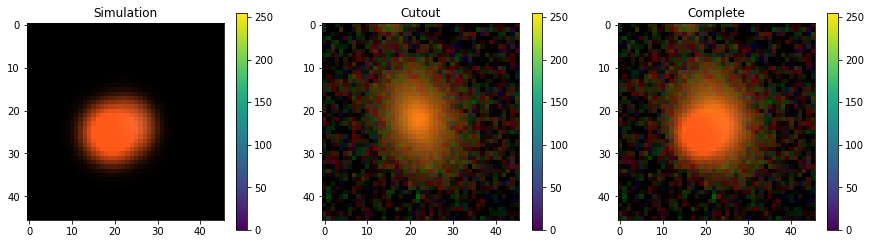

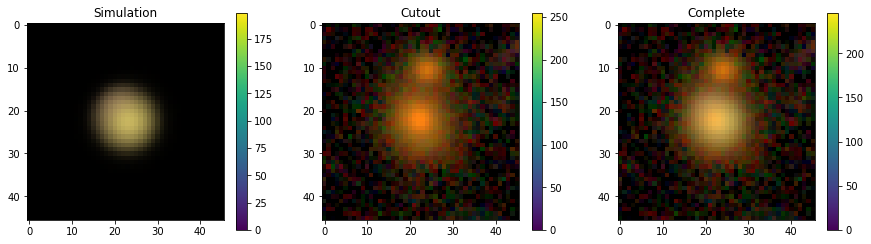

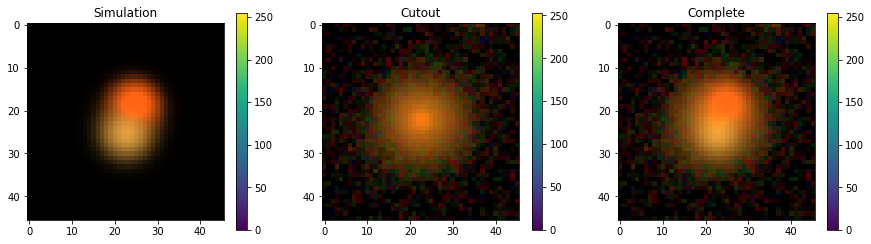

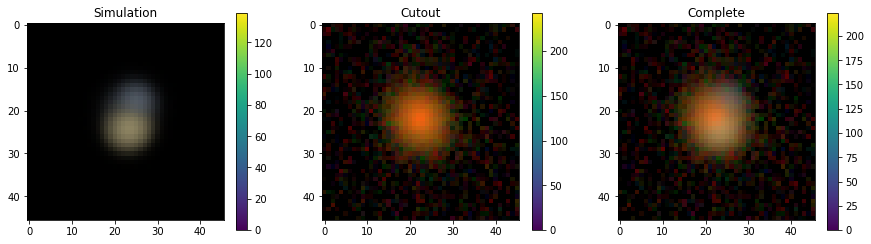

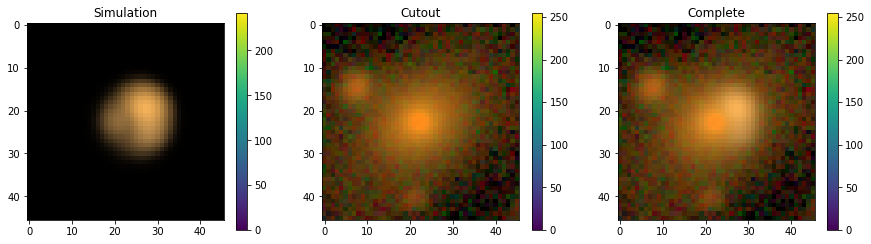

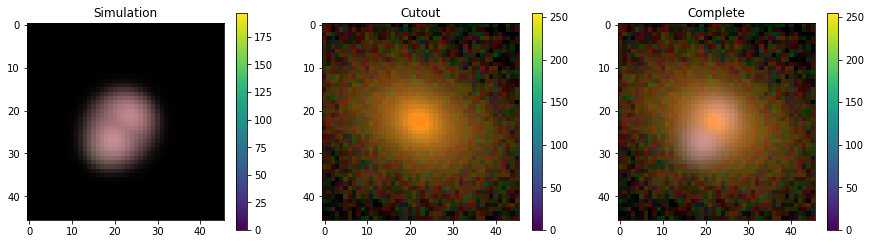

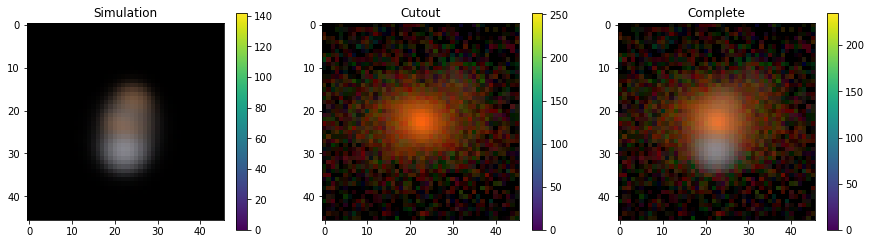

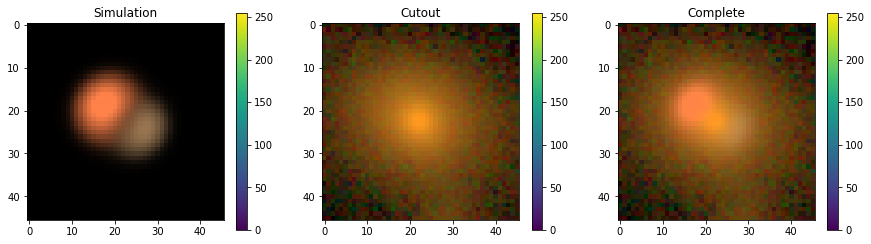

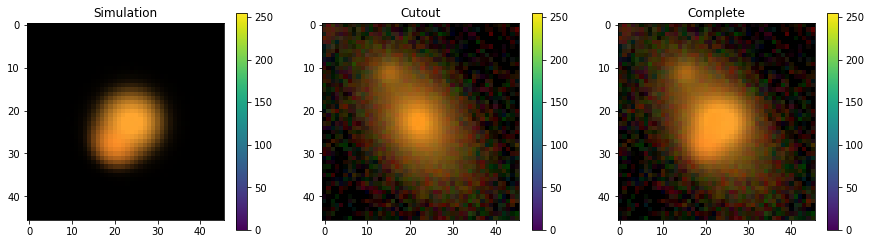

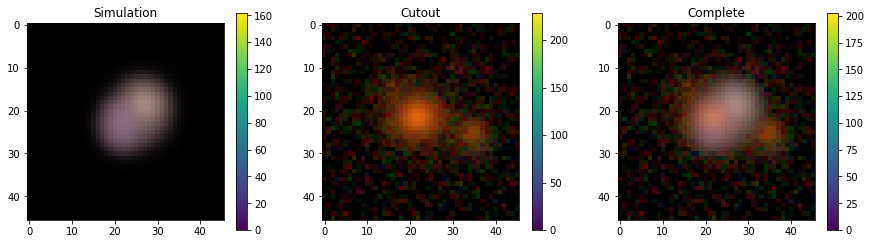

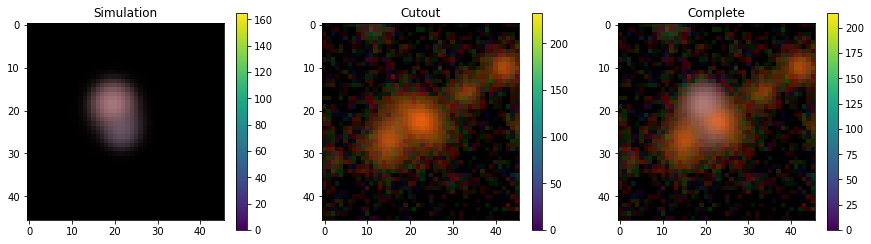

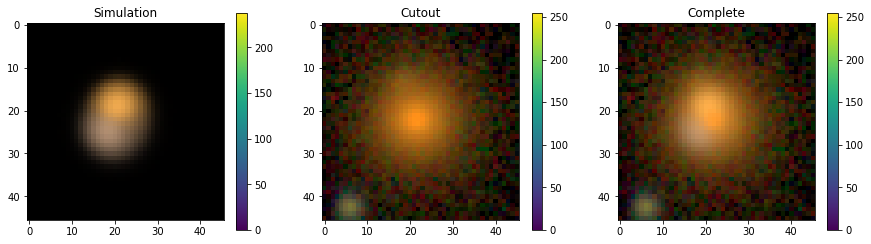

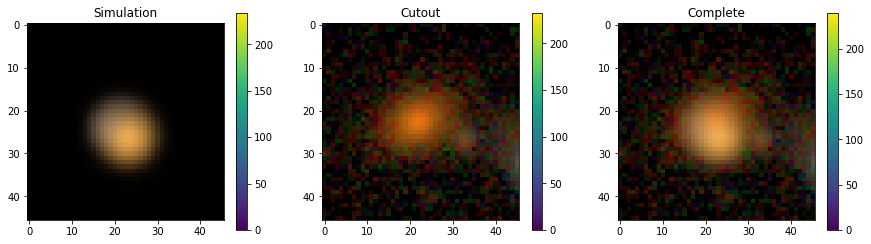

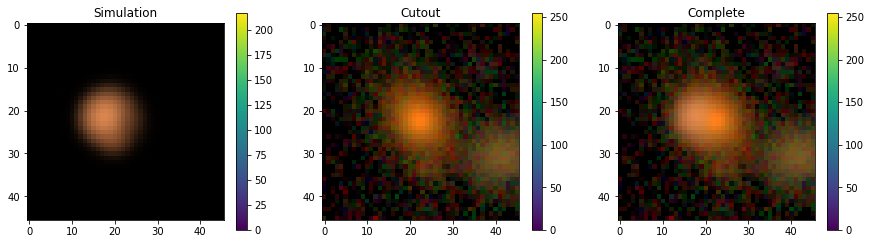

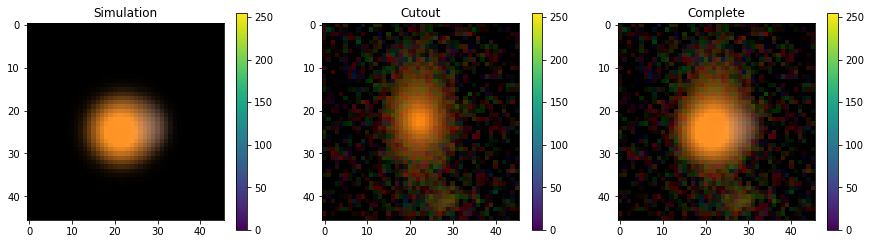

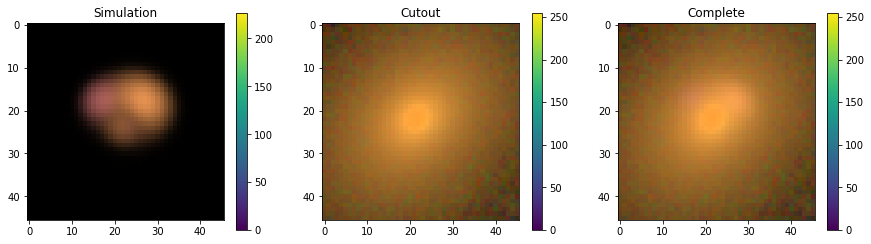

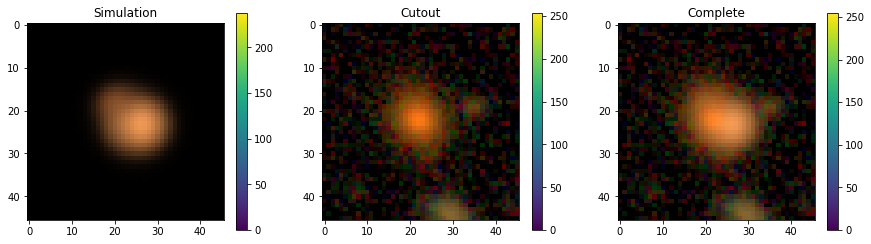

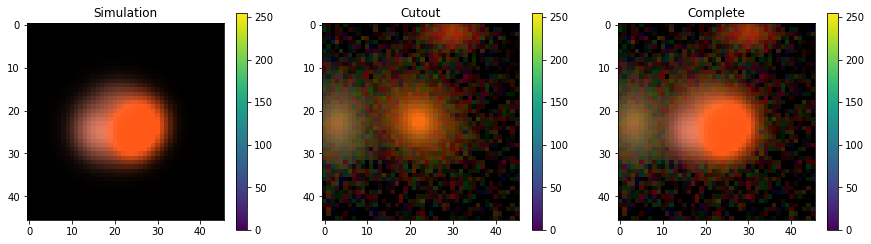

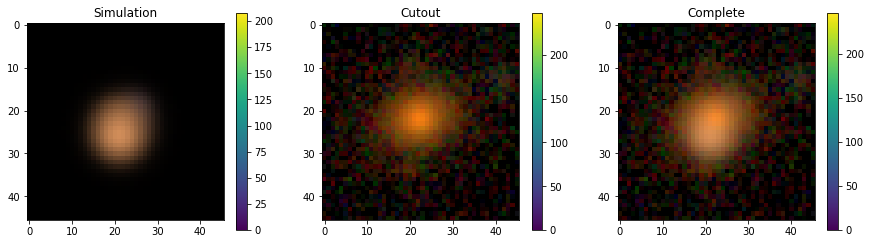

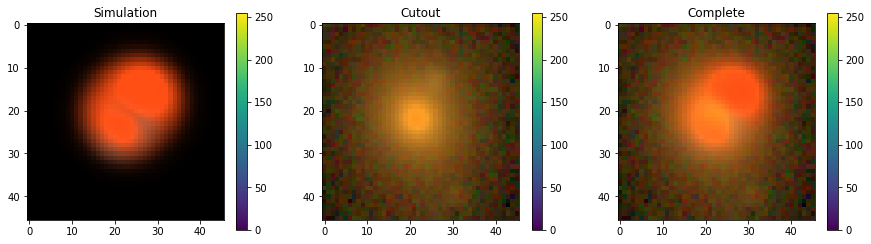

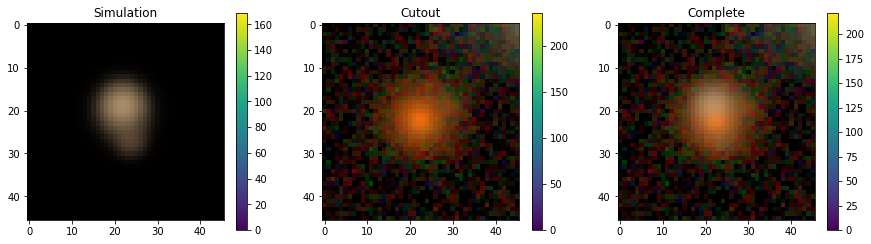

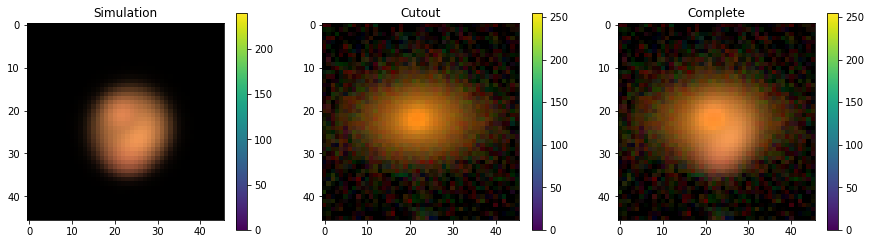

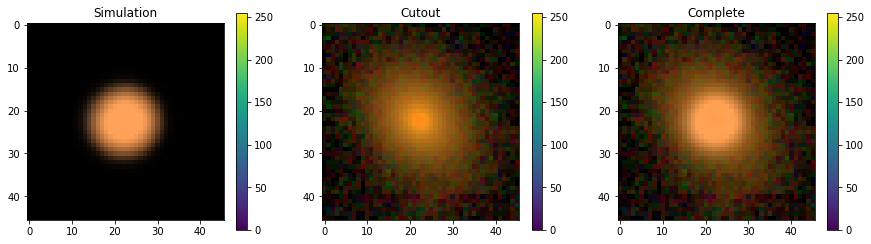

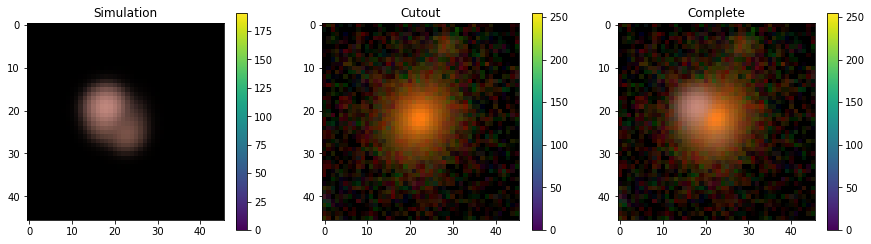

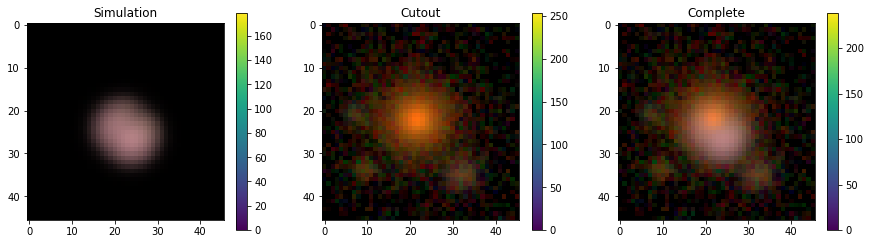

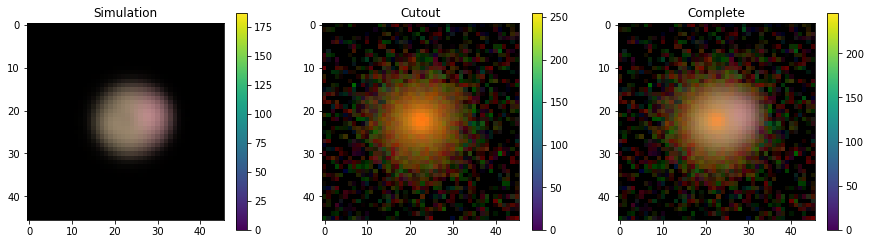

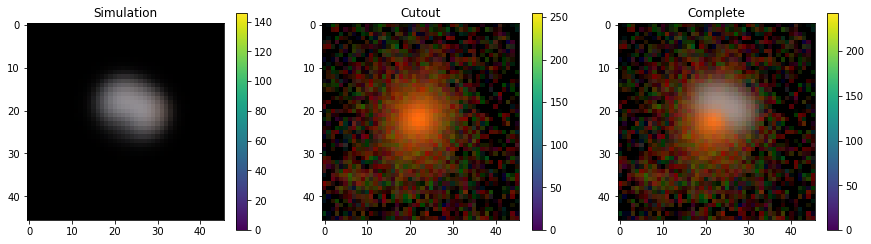

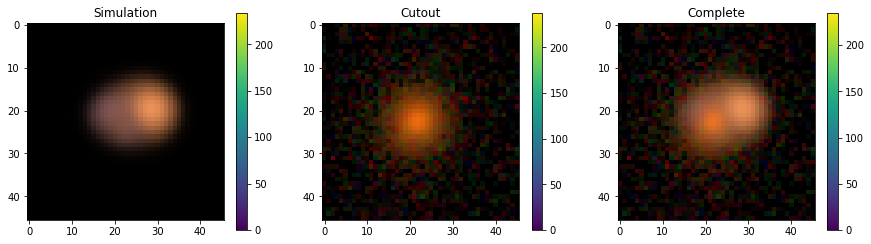

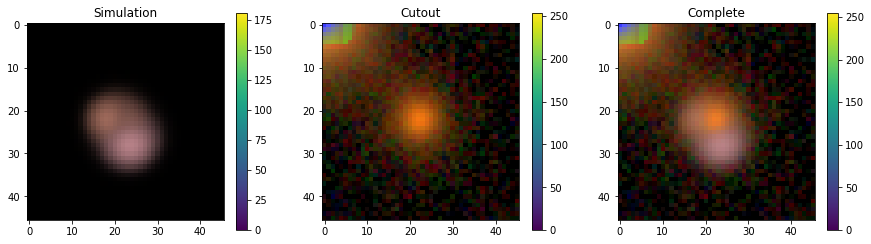

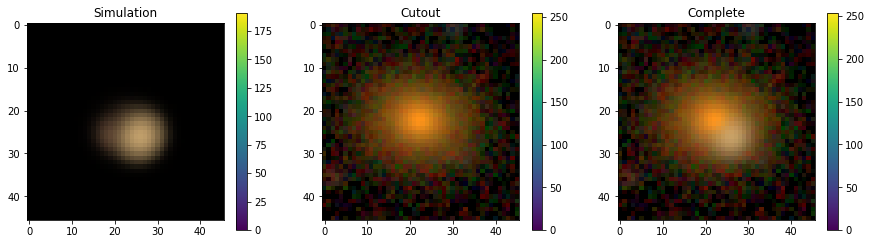

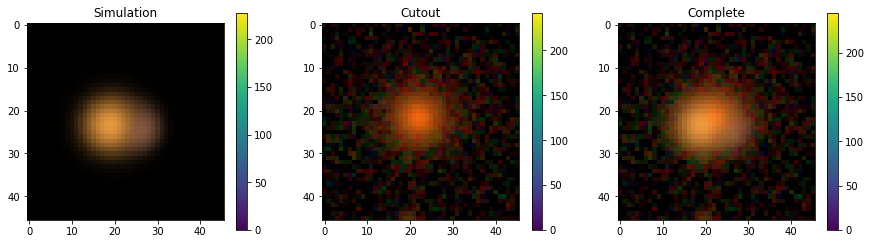

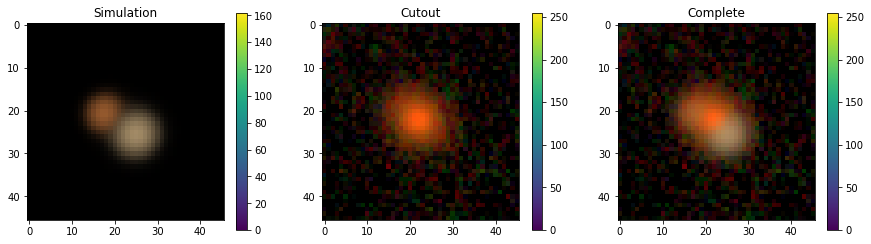

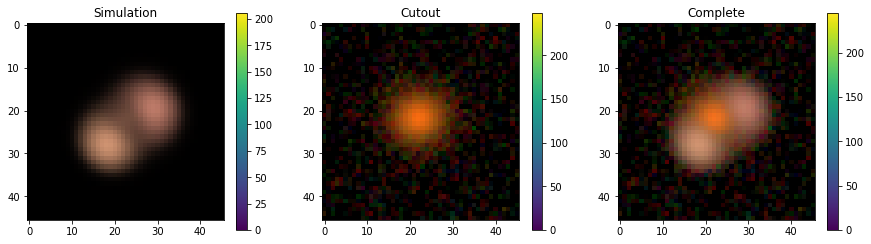

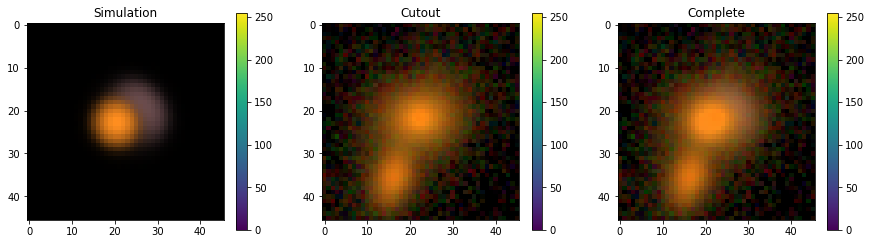

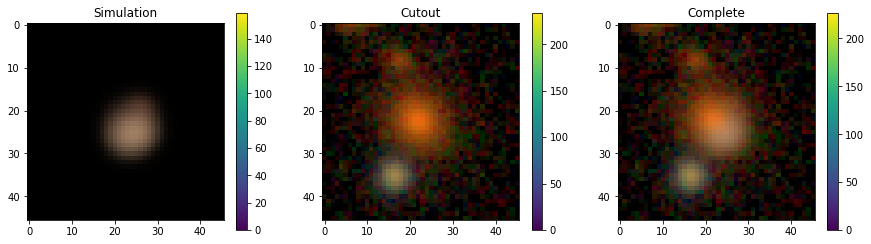

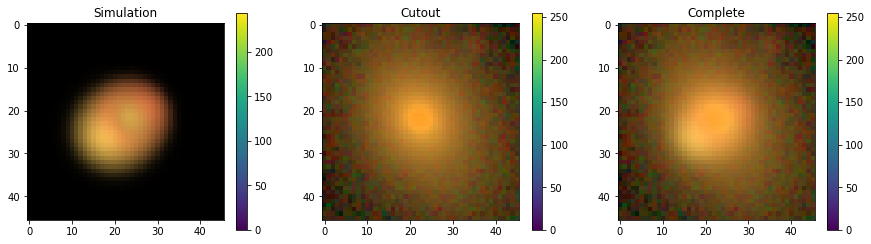

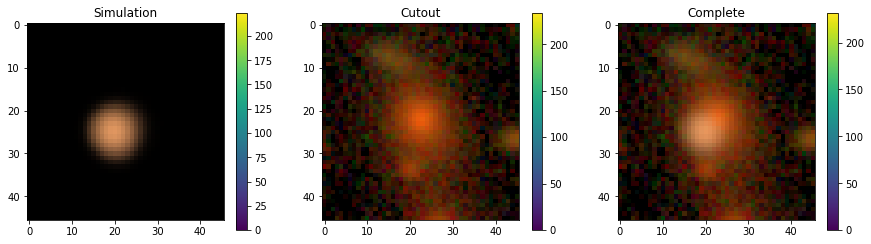

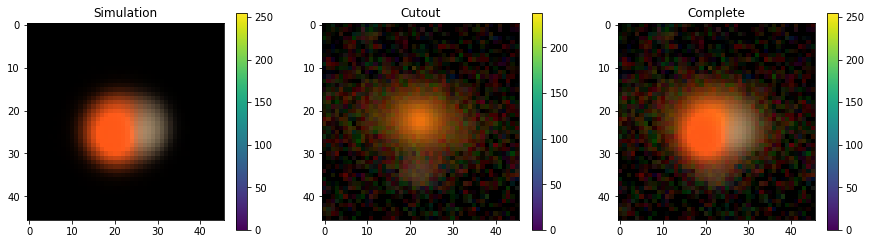

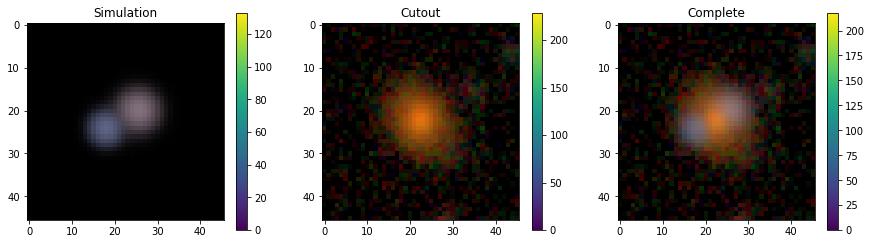

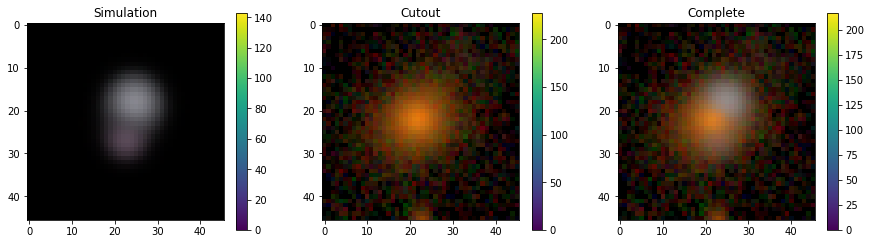

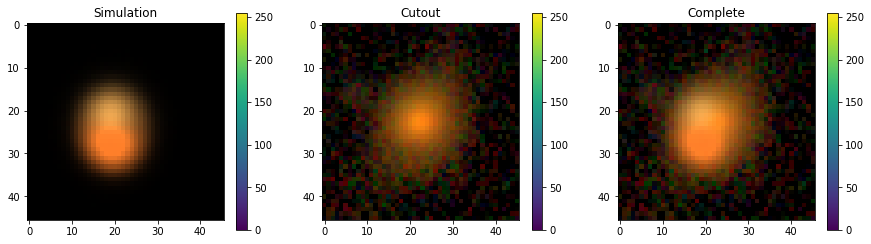

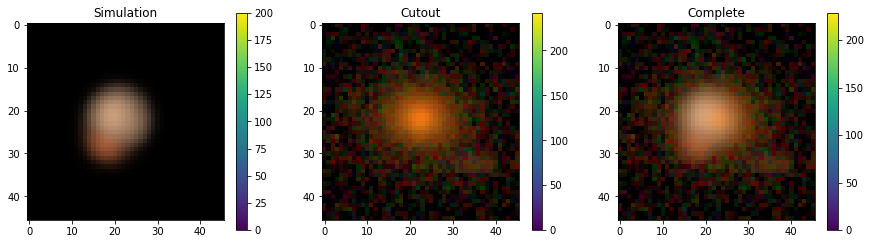

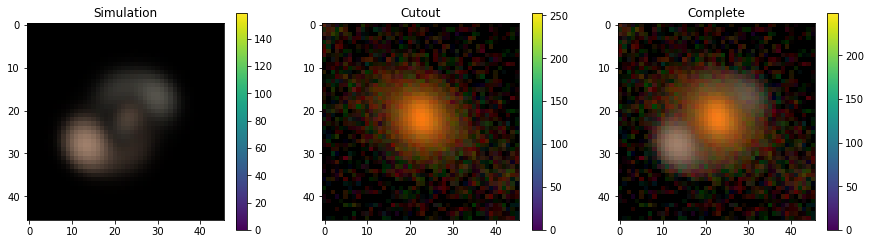

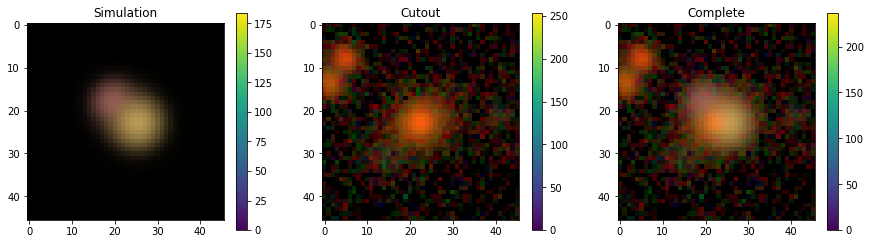

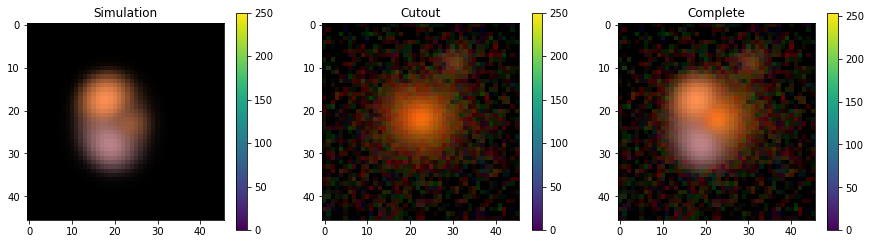

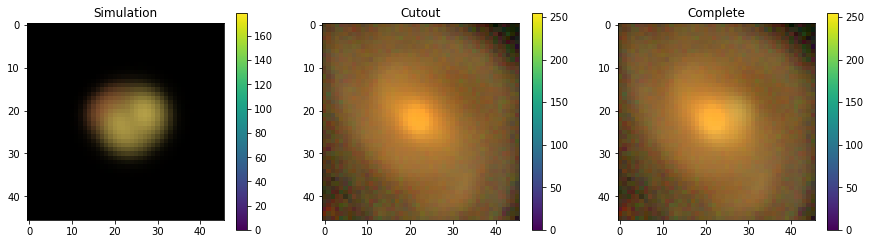

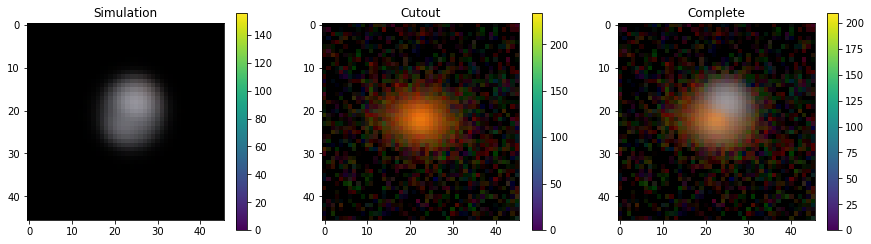

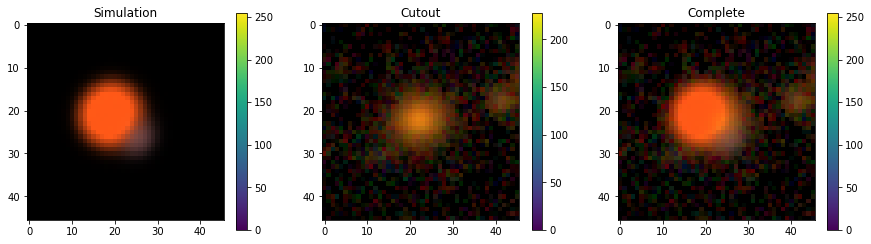

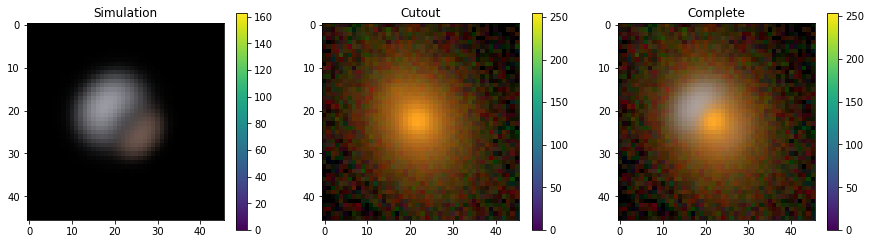

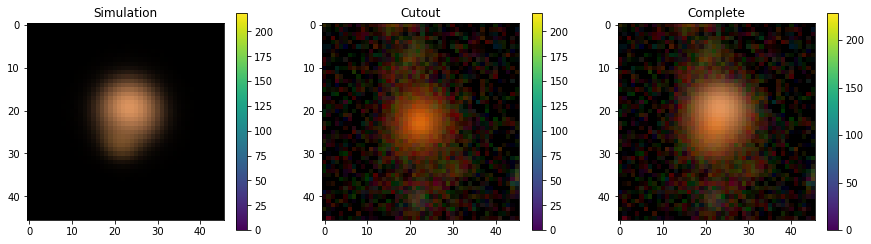

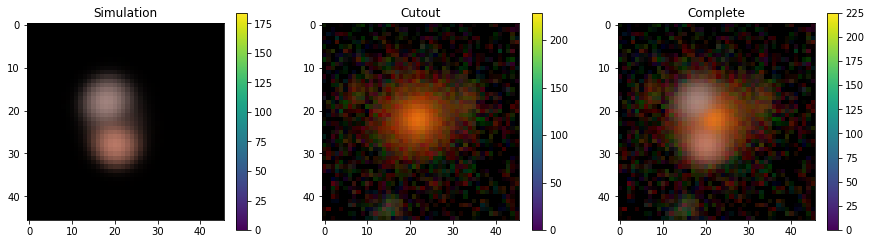

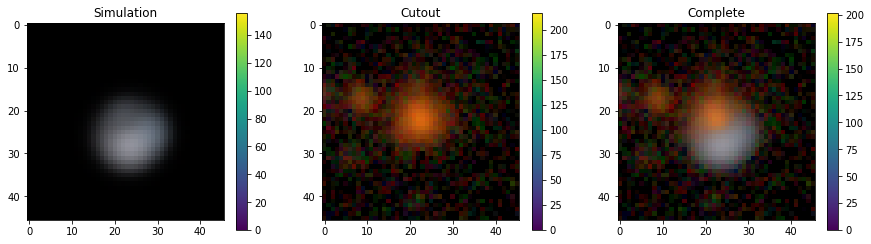

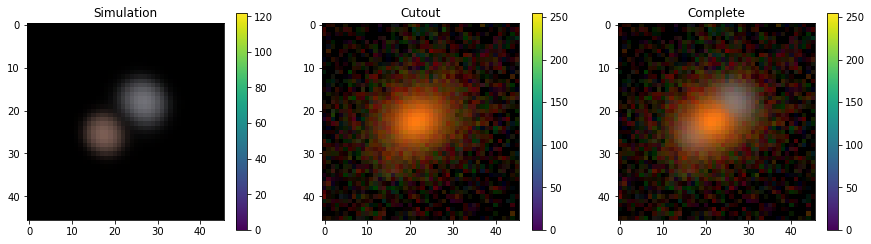

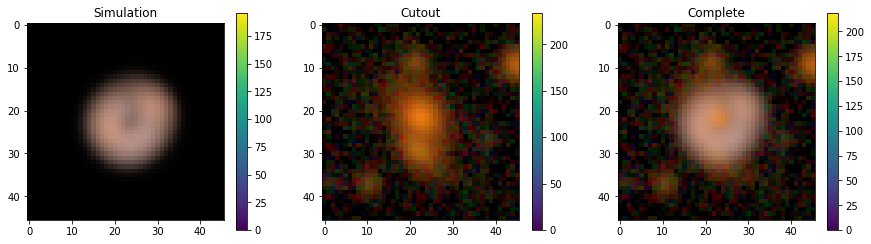

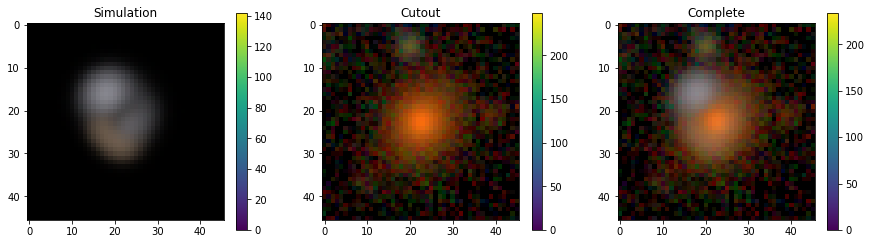

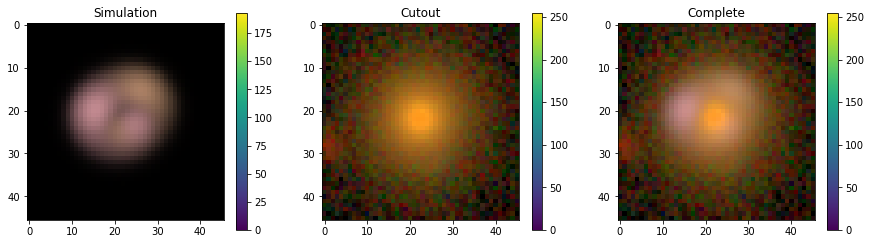

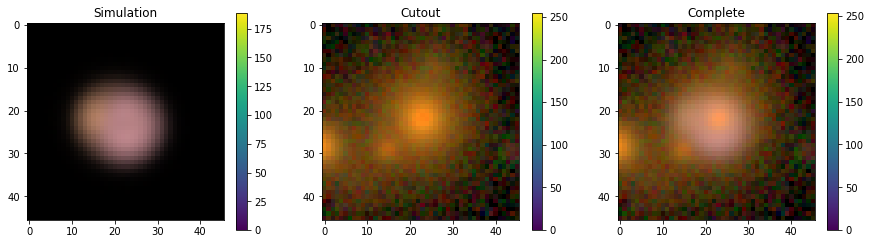

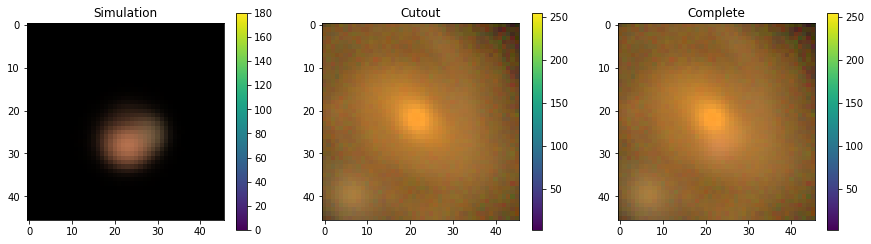

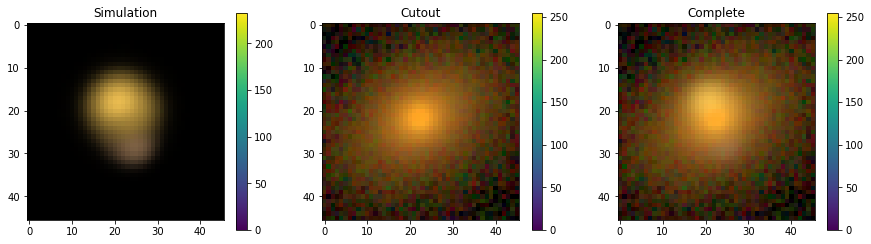

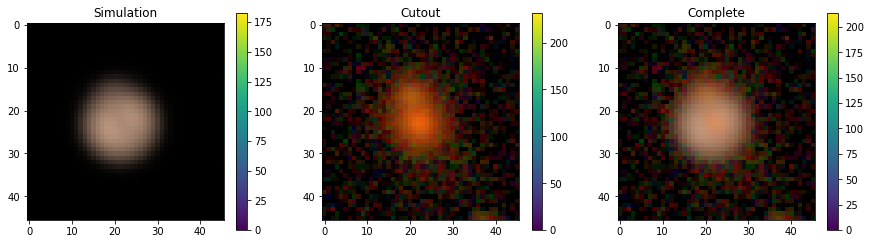

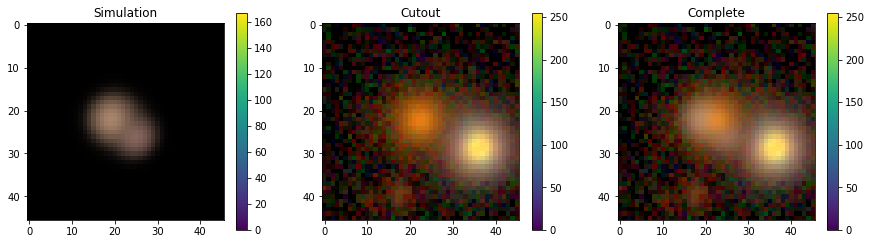

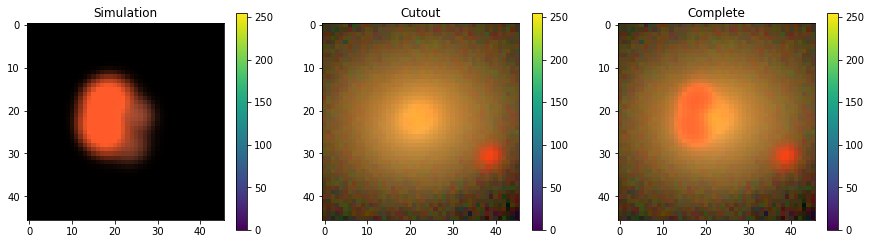

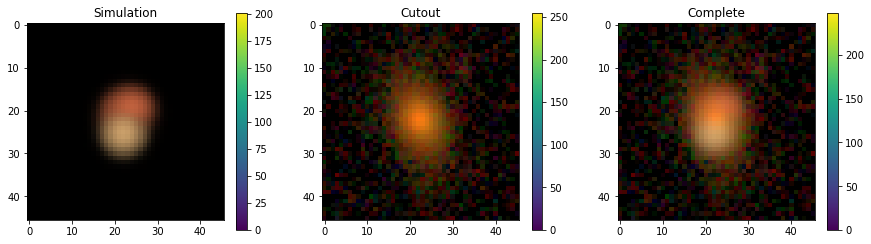

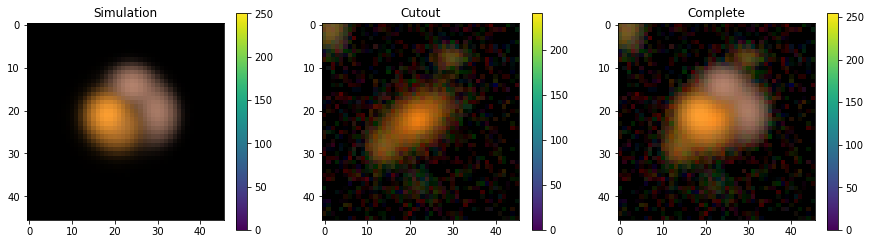

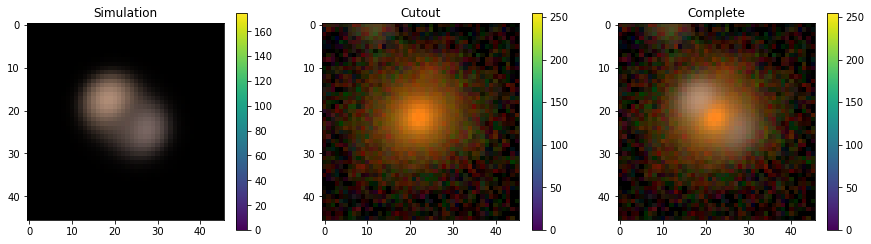

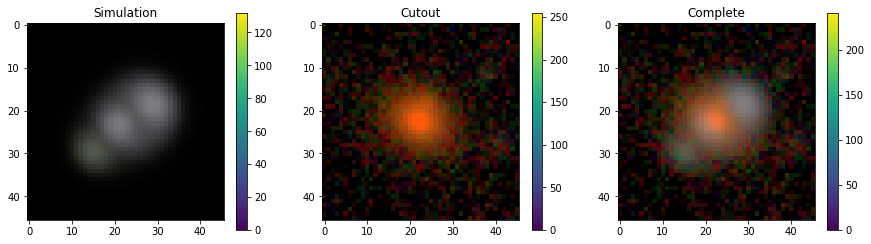

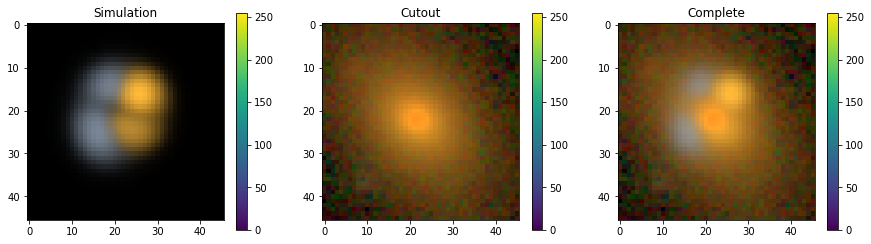

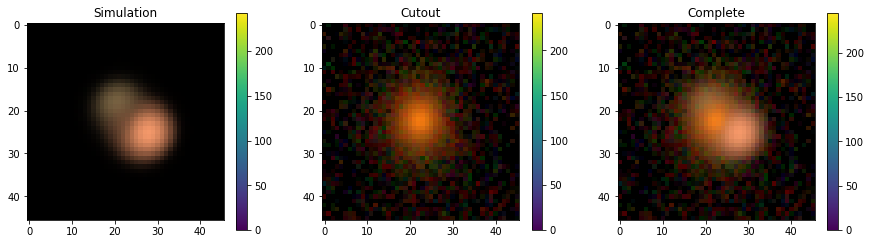

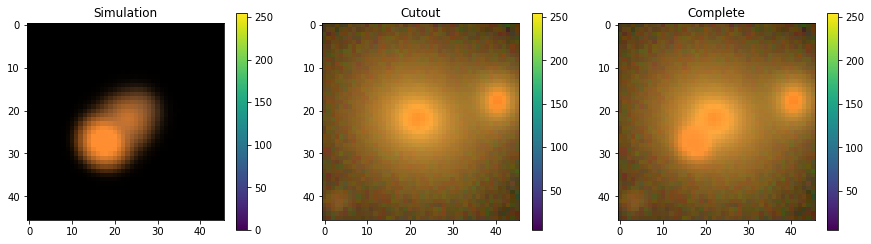

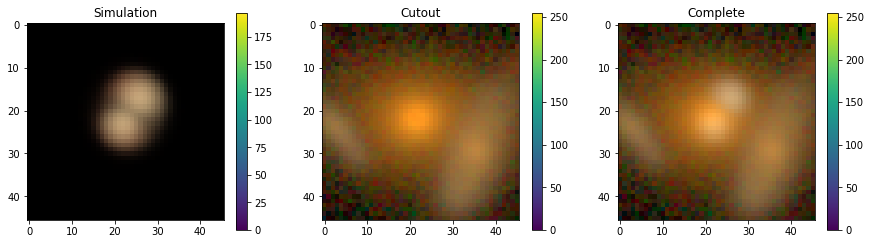

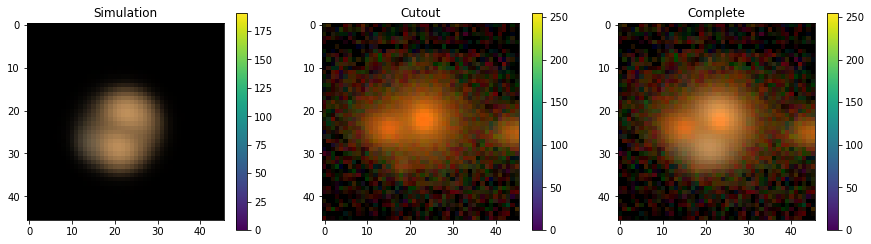

IndexError: index 100 is out of bounds for axis 0 with size 100

In [4]:
#Adding cutouts and simulations - New Pixels
directory_sim = '/Users/jimenagonzalez/research/DSPL/Simulations-Double-Source-Gravitational-Lensing/Data/Sim/'
directory_parent = 'Data/Cutouts-coadd2/'
folders = next(os.walk(directory_parent))[1]
x = np.zeros((100,3,46,46))
n = 0

#new_folder has the ID of the galaxy
for folder in folders:
    new_folders = sorted(next(os.walk(directory_parent + folder))[1])
    for new_folder in new_folders:
        if(n >= 300):
            break
        files = sorted(next(os.walk(directory_parent + folder + '/' + new_folder))[2])
        for file in files:
            path_cutout = directory_parent + folder + '/' + new_folder + '/' + file
            path_sim = directory_sim + 'sim_' + new_folder + '_' + file[-6:]
            if(path.exists(path.exists(path_sim)) == False):
                continue
            with fits.open(path_cutout) as hdul:
                if file[-6:] == 'g.fits': cutout_g = hdul[0].data
                if file[-6:] == 'i.fits': cutout_i = hdul[0].data
                if file[-6:] == 'r.fits': cutout_r = hdul[0].data
            with fits.open(path_sim) as hdul:
                if file[-6:] == 'g.fits': sim_g = hdul[0].data
                if file[-6:] == 'i.fits': sim_i = hdul[0].data
                if file[-6:] == 'r.fits': sim_r = hdul[0].data
        x[n][0], x[n][1], x[n][2] = cutout_g + sim_g, cutout_r + sim_r, cutout_i + sim_i
        n = n + 1
        
        fig, (ax1, ax2, ax3) = plt.subplots(figsize=(15, 4), ncols=3)

        rgb = make_lupton_rgb(sim_i, sim_r, sim_g, Q=11., stretch=40.)
        ax1.set_title('Simulation')
        original = ax1.imshow(rgb, aspect='equal')
        fig.colorbar(original, ax=ax1)

        rgb = make_lupton_rgb(cutout_i, cutout_r, cutout_g, Q=11., stretch=40.)
        ax2.set_title('Cutout')
        cutout = ax2.imshow(rgb, aspect='equal')
        fig.colorbar(cutout, ax=ax2)
            
        rgb = make_lupton_rgb(sim_i+cutout_i, sim_r+cutout_r, sim_g+cutout_g, Q=11., stretch=40.)
        ax3.set_title('Complete')
        projection = ax3.imshow(rgb, aspect='equal')
        fig.colorbar(projection, ax=ax3)
        
        plt.savefig('Data/Sim_complete/Image' + new_folder + '.png', bbox_inches='tight')
        plt.show()

In [ ]:
primary = fits.PrimaryHDU()
image = fits.ImageHDU(x, name="IMAGE")
hdu_list = fits.HDUList([primary, image])
hdu_list.writeto('complete.fits', overwrite=True)